<a href="https://colab.research.google.com/github/Abid-Hasan/digit-recognition/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the image data to values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the target labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)




In [ ]:
# Create a sequential model
model = Sequential()

# Flatten the 2D image data to 1D for input to the neural network
model.add(Flatten(input_shape=(28, 28)))

# Add a hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the output layer with 10 neurons (one for each digit) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model with appropriate loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




In [ ]:
# Train the model on the training data
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2816 - accuracy: 0.9185 - val_loss: 0.1560 - val_accuracy: 0.9553
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1236 - accuracy: 0.9635 - val_loss: 0.1101 - val_accuracy: 0.9662
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0856 - accuracy: 0.9742 - val_loss: 0.0979 - val_accuracy: 0.9719
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0647 - accuracy: 0.9810 - val_loss: 0.0964 - val_accuracy: 0.9703
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0812 - accuracy: 0.9748
Test accuracy: 0.9747999906539917


1/1 [==============================] - 0s 57ms/step


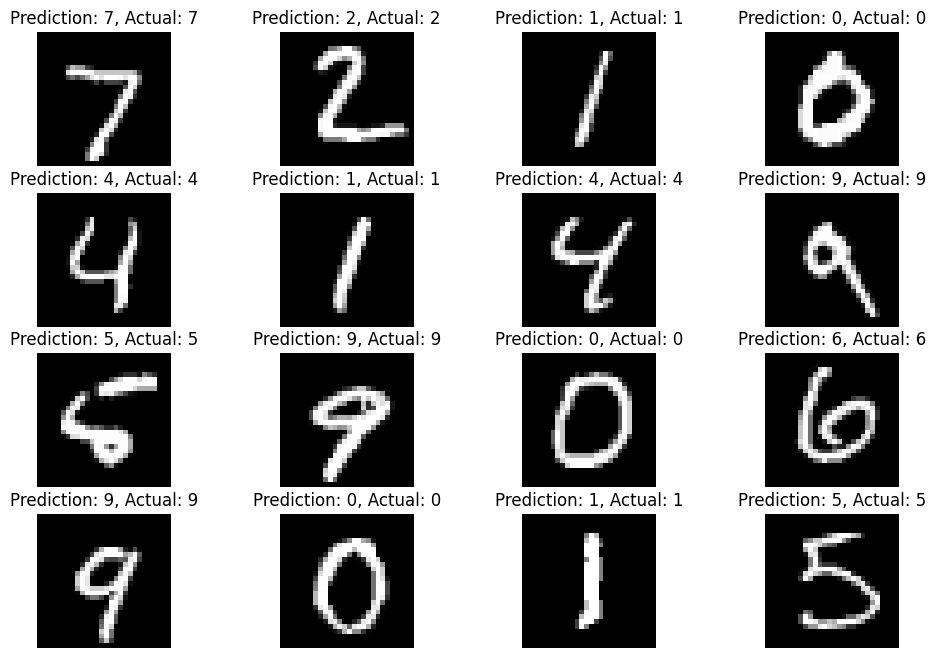

In [ ]:
# Display some sample predictions along with their actual values
predictions = model.predict(X_test[:16])
fig, axes = plt.subplots(4, 4, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], cmap='gray')
    ax.set_title(f"Prediction: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")
    ax.axis('off')

plt.show()